In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)

## Importing the files

In [3]:
import os
path = 'D:\Term 1\EDA\data-society-global-terrorism-data\original'
os.chdir(path)
file1 = pd.read_csv("gtd_70to91_49566.csv",encoding = 'latin',low_memory = False)
file2 = pd.read_csv("gtd_92to11_no 93_55072.csv",encoding = 'latin',low_memory = False)
file3 = pd.read_csv("gtd1993_748.csv",encoding = 'latin',low_memory = False)
file4 = pd.read_csv("gtd_12to15_52134.csv",encoding = 'latin',low_memory = False)

In [4]:
final_ls = [file1, file2, file3, file4]
final_file = pd.concat(final_ls,axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
final_file.shape

(157520, 137)

## How have casualties evolved throughout the years??

In [6]:
nkill = final_file[['iyear','nkill','nwound']]
nkill = nkill.fillna(0)
nkill = nkill.groupby(['iyear'])[['nkill','nwound']].sum().reset_index()
nkill['Total'] = nkill['nkill'] + nkill['nwound']
nkill.to_csv('Question_1.csv')
nkill.head()

,iyear,nkill,nwound,Total
0,1970,171.0,192.0,363.0
1,1971,173.0,82.0,255.0
2,1972,566.0,222.0,788.0
3,1973,370.0,495.0,865.0
4,1974,542.0,754.0,1296.0


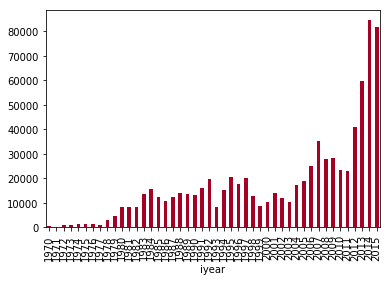

In [7]:
nkill.plot(x='iyear',y='Total',kind='bar',legend=None, colormap = 'RdYlGn')

## Are certain nationalities more targeted? If yes, which one??

In [8]:
nation = final_file[['natlty1_txt']]
nation = nation.groupby('natlty1_txt').size().reset_index()
nation.loc[0,'natlty1_txt'] = 'Unknown'
nation = nation.rename(columns = {0:'No_of_attack'})
nation = nation.sort_values(by = 'No_of_attack',ascending = False)
nation.to_csv('Question_2.csv')
nation.head()

,natlty1_txt,No_of_attack
87,Iraq,18284
141,Pakistan,12326
83,India,10106
1,Afghanistan,8235
37,Colombia,7716


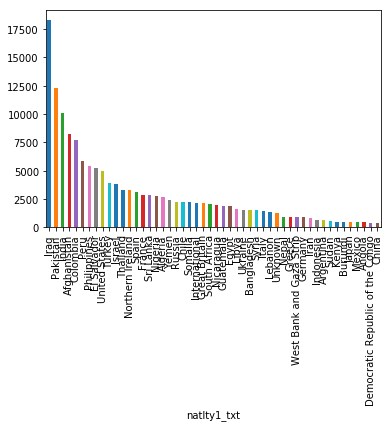

In [9]:
nation[:50].plot(x='natlty1_txt',y='No_of_attack',kind='bar',legend=None, colormap = None)

## Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live??

In [10]:
nation_attact = final_file.groupby('natlty1_txt')['eventid'].count().reset_index()
nation_attact.head()

,natlty1_txt,eventid
0,.,1243
1,Afghanistan,8235
2,Albania,94
3,Algeria,2651
4,Angola,422


In [11]:
nation_kill = final_file.groupby('natlty1_txt')['nkill','nwound'].sum().reset_index()
nation_kill['total'] = nation_kill['nkill'] + nation_kill['nwound']
nation_kill.head()

,natlty1_txt,nkill,nwound,total
0,.,1762.00,1661.00,3423.00
1,Afghanistan,24179.33,28941.11,53120.44
2,Albania,74.00,120.00,194.00
3,Algeria,10919.00,9015.00,19934.00
4,Angola,2802.00,2060.00,4862.00


In [12]:
safest_nation = pd.merge(nation_attact,nation_kill,left_on='natlty1_txt',right_on='natlty1_txt')
safest_nation.head(10)

,natlty1_txt,eventid,nkill,nwound,total
0,.,1243,1762.00,1661.00,3423.00
1,Afghanistan,8235,24179.33,28941.11,53120.44
2,Albania,94,74.00,120.00,194.00
3,Algeria,2651,10919.00,9015.00,19934.00
4,Angola,422,2802.00,2060.00,4862.00
5,Antigua and Barbuda,1,0.00,0.00,0.00
6,Argentina,640,429.00,514.00,943.00
7,Armenia,38,35.00,98.00,133.00
8,Asian,19,175.00,32.00,207.00
9,Australia,111,79.00,309.00,388.00


In [13]:
safest_nation['percentage'] = (safest_nation['total']/safest_nation['eventid'])*100
safest_nation = safest_nation.sort_values(by = 'percentage', ascending = True)
safest_nation.head(20)

,natlty1_txt,eventid,nkill,nwound,total,percentage
197,United Kingdom,1,0.0,0.0,0.0,0.000000
207,Western Sahara,1,0.0,0.0,0.0,0.000000
201,Vanuatu,2,0.0,0.0,0.0,0.000000
5,Antigua and Barbuda,1,0.0,0.0,0.0,0.000000
116,"Man, Isle of",1,0.0,0.0,0.0,0.000000
18,Belize,4,0.0,0.0,0.0,0.000000
71,Greenland,1,0.0,0.0,0.0,0.000000
132,New Zealand,18,2.0,0.0,2.0,11.111111
40,Corsica,35,3.0,2.0,5.0,14.285714
150,Puerto Rico,71,5.0,6.0,11.0,15.492958


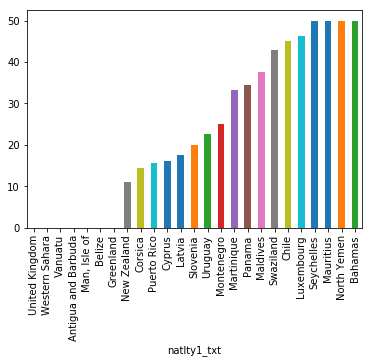

In [14]:
%matplotlib inline
q3 = safest_nation[:25]
q3.plot(x='natlty1_txt',y='percentage',kind='bar',legend=None)

In [15]:
safest_nation.to_csv('Question_3.csv')

## Terror attack pattern in United States vs Russian Federation/USSR in last 45 years??

In [16]:
USvR = final_file[['iyear','country_txt','eventid']]

US = USvR[(USvR['country_txt'] == 'United States')] 
R = USvR[(USvR['country_txt'] == 'Soviet Union') | 
            (USvR['country_txt'] == 'Russia')]
US = US.groupby(['iyear','country_txt'])['eventid'].count().reset_index()
R = R.groupby(['iyear','country_txt'])['eventid'].count().reset_index()
US.to_csv('Question_4(US).csv')
US.head()

,iyear,country_txt,eventid
0,1970,United States,468
1,1971,United States,247
2,1972,United States,64
3,1973,United States,58
4,1974,United States,94


In [17]:
R.to_csv('Question_4(R).csv')
R.head()

,iyear,country_txt,eventid
0,1978,Soviet Union,1
1,1989,Soviet Union,7
2,1990,Soviet Union,36
3,1991,Soviet Union,34
4,1992,Russia,21


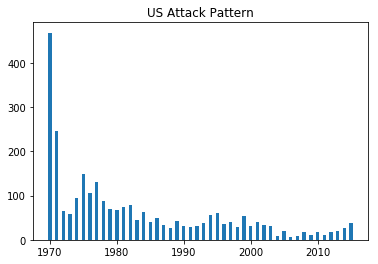

In [18]:
plt.bar(US['iyear'],US['eventid'],width=0.5)
plt.rcParams['figure.figsize'] = [15,5]
plt.title('US Attack Pattern')
plt.show()

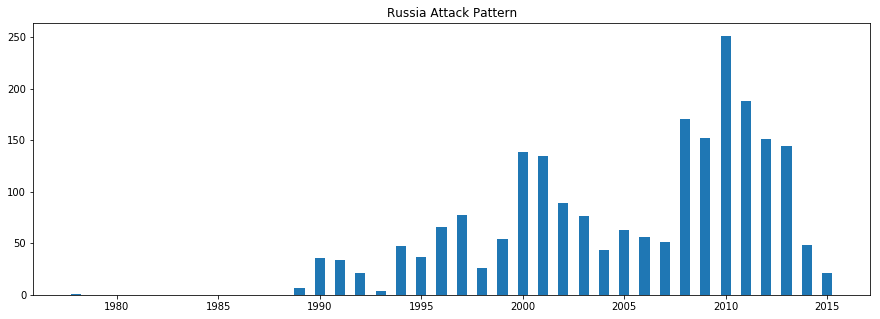

In [19]:
plt.bar(R['iyear'],R['eventid'],width=0.5)
plt.rcParams['figure.figsize'] = [15,5]
plt.title('Russia Attack Pattern')
plt.show()

## Terrorist attack in India and Pakistan in last 45 years??

In [20]:
IvP = final_file[['iyear','country_txt','eventid']]

IvP = IvP[(IvP['country_txt'] == 'India') | (IvP['country_txt'] == 'Pakistan')]
IvP = IvP.groupby(['iyear','country_txt'])['eventid'].count().reset_index()

I = IvP[(IvP['country_txt'] == 'India')]
P = IvP[(IvP['country_txt'] == 'Pakistan')]

In [21]:
I.to_csv('Question_5(india).csv')
P.to_csv('Question_5(pakistan).csv')

In [22]:
I.head()

,iyear,country_txt,eventid
1,1972,India,1
3,1975,India,1
5,1976,India,1
7,1977,India,1
9,1979,India,20


In [23]:
P.head()

,iyear,country_txt,eventid
0,1970,Pakistan,1
2,1974,Pakistan,2
4,1975,Pakistan,2
6,1976,Pakistan,3
8,1978,Pakistan,2


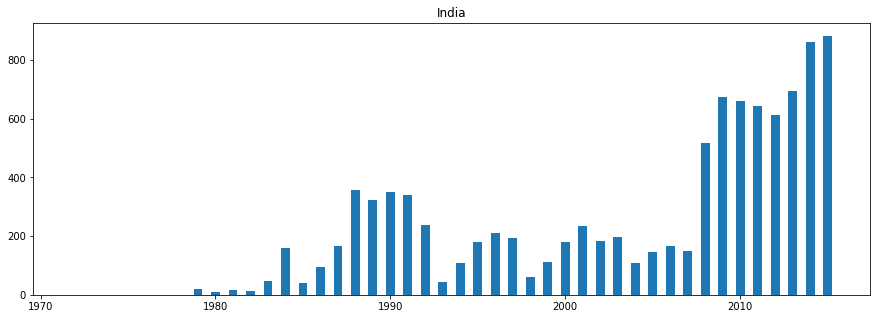

In [24]:
plt.bar(I['iyear'],I['eventid'],width=0.5)
plt.rcParams['figure.figsize'] = [15,5]
plt.title('India')
plt.show()

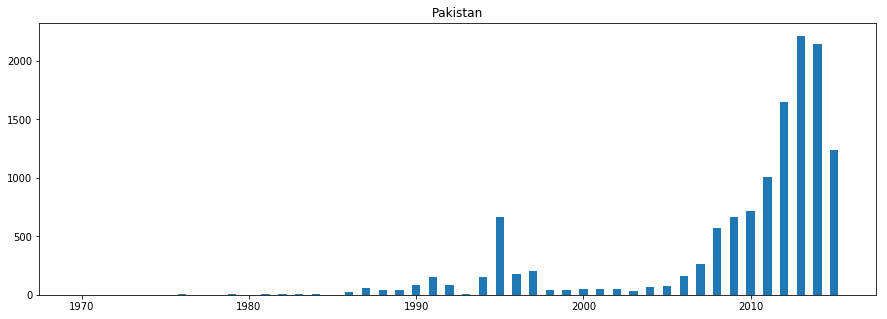

In [25]:
plt.bar(P['iyear'],P['eventid'],width=0.5)
plt.rcParams['figure.figsize'] = [15,5]
plt.title('Pakistan')
plt.show()

## Heaviest hit Target types (Based on both Killed and wounded)??

In [26]:
hit_target = final_file[['targtype1_txt','nkill','nwound']]
hit_target = hit_target.groupby(['targtype1_txt'])[['nkill','nwound']].sum().reset_index()
hit_target['Total'] = hit_target['nkill'] + hit_target['nwound']
hit_target = hit_target.sort_values(by = 'Total',ascending = False)
hit_target.to_csv('Question_6.csv')
hit_target.head()

,targtype1_txt,nkill,nwound,Total
14,Private Citizens & Property,117954.870,136303.150,254258.020
10,Military,87587.680,58886.230,146473.910
13,Police,44660.345,55928.690,100589.035
3,Business,20267.910,48470.215,68738.125
7,Government (General),23419.845,37868.220,61288.065


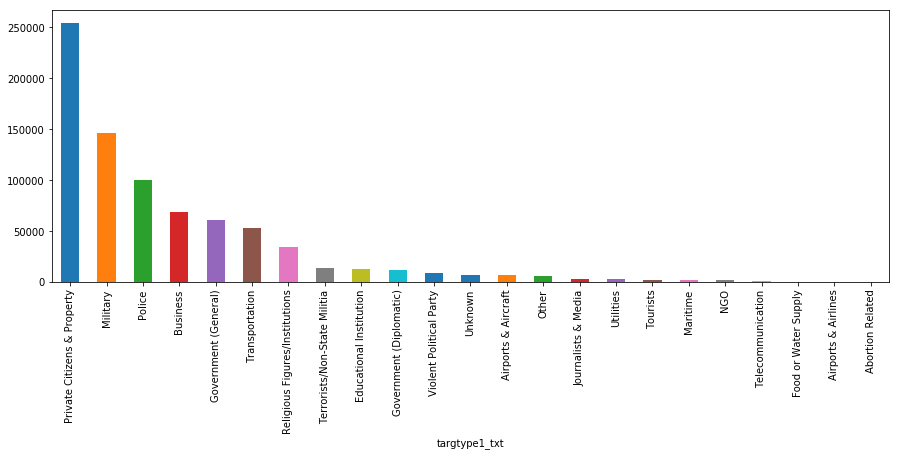

In [27]:
hit_target.plot(x='targtype1_txt',y='Total',kind='bar',legend=None)